# 1. Perkenalan

## Nama : Fadhola Asandi Mardika Putra


## Objective : 

- Link dataset: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

- Judul dataset: Heart Failure Clinical Records

- Model Classification

## Problem:

Gagal jantung adalah salah satu penyebab utama kematian di dunia, termasuk di Indonesia. Kondisi ini terjadi ketika jantung tidak mampu memompa darah secara efektif ke seluruh tubuh, sehingga menyebabkan berbagai komplikasi serius. Deteksi dini terhadap pasien yang memiliki risiko tinggi mengalami kematian akibat gagal jantung sangat penting untuk mencegah kondisi yang lebih buruk dan menurunkan angka kematian. Proyek ini bertujuan untuk memprediksi kemungkinan kematian pasien akibat gagal jantung berdasarkan data klinis mereka saat pemeriksaan dan akan digunakan untuk menentukan apakah seorang pasien berisiko meninggal dalam masa follow-up atau tidak.
Jika pasien terprediksi berisiko tinggi mengalami kematian, maka akan diberikan artikel dan saran medis untuk penanganan dini dan manajemen penyakit gagal jantung dan rekomendasi tindakan preventif seperti pengaturan diet, olahraga, dan pengobatan.
Jika pasien terprediksi tidak berisiko tinggi, maka akan diberikan edukasi tentang pentingnya kontrol rutin dan ciri-ciri awal gejala gagal jantung.
Fokus proyek adalah pada klasifikasi risiko kematian akibat gagal jantung berdasarkan data klinis pasien.

## Justifikasi :

- https://pharmaceutical-journal.com/article/news/chronic-heart-failure-deaths-could-fall-by-3000-per-year-following-updated-guidance-says-nice

- https://www.medscape.com/viewarticle/nice-recommends-earlier-treatments-chronic-heart-failure-2025a1000flk

- https://scitechdaily.com/startling-health-risk-normal-sodium-levels-linked-to-heart-failure/

User/pengguna : Masyarakat luas yang hendak mengecek potensi terkena gagal jantung yang memiliki semua atribut data seperti pada dataset aslinya.


---

## Thirteen (13) clinical features:

---

1. `age` Deskripsi: Usia pasien (dalam tahun).

2. `anaemia` Deskripsi: Kondisi penurunan sel darah merah atau hemoglobin (boolean: `true` jika ya, `false` jika tidak).

3. `creatinine_phosphokinase (CPK)`
    - Deskripsi: Tingkat enzim CPK dalam darah.
    - Satuan: mcg/L (mikrogram per liter).
    - Kisaran Normal: Umumnya antara 10 hingga 120 mcg/L.

4. `diabetes`
    - Deskripsi: Indikasi apakah pasien memiliki diabetes (boolean: `true` jika ya, `false` jika tidak).

5. `ejection_fraction`
    - Deskripsi: Persentase darah yang dipompa keluar dari jantung setiap kontraksi.
    - Satuan: Persentase (%).
    - Kisaran Normal: Jantung sehat biasanya memiliki 50% hingga 70%. EF yang lebih rendah (misalnya, di bawah 50%) dapat menjadi tanda gagal jantung.

6. `high_blood_pressure`
    - Deskripsi: Indikasi apakah pasien memiliki hipertensi atau tekanan darah tinggi (boolean: `true` jika ya, `false` jika tidak).

7. `platelets (trombosit)`
    - Deskripsi: Jumlah trombosit dalam darah.
    - Satuan: kiloplatelets/mL.
    - Kisaran Normal: Umumnya antara 150 hingga 450 kiloplatelets/mL (setara dengan 150.000 - 450.000/mcL).

8. `sex`
    - Deskripsi: Jenis kelamin pasien (binary: `0` untuk wanita, `1` untuk pria).

9. `serum_creatinine`
    - Deskripsi: Tingkat kreatinin serum dalam darah, kadar tinggi/rendah menandakan masalah pada fungsi ginjal
    - Satuan: mg/dL (miligram per desiliter).
    - Kisaran Normal:
        - Pria: Sekitar 0.7 hingga 1.3 mg/dL.
        - Wanita: Sekitar 0.6 hingga 1.1 mg/dL.

10. `serum_sodium`
    - Deskripsi: Tingkat natrium serum dalam darah.
    - Satuan: mEq/L (miliekuivalen per liter).
    - Kisaran Normal: Umumnya 135 hingga 145 mEq/L. Kadar rendah(hiponatremia) tanda gagal jantung dan tinggi(hipernatremia) tanda kurang air atau dehidrasi

11. `smoking`
    - Deskripsi: Indikasi apakah pasien merokok atau tidak (boolean: `true` jika ya, `false` jika tidak).

12. `time`
    - Deskripsi: Periode tindak lanjut (follow-up) pasien (dalam hari).

13. `death_event` (Target)
    - Deskripsi: Variabel target yang menunjukkan apakah pasien meninggal selama periode tindak lanjut (boolean: `true` jika meninggal, `false` jika tidak).

---

# 2. Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, kendalltau
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,  f1_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
import pickle



# 3. Data Loading

In [93]:
# Load Dataset
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [94]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [95]:
# Cek duplicated
df.duplicated().sum()

np.int64(0)

# 4. Exploratory Data Analysis (EDA)

### 1. Bagaimana pola distribusi umur pasien dan dan platelets, apakah banyak lansia? dan apakah platelets/trombosit pasien normal?

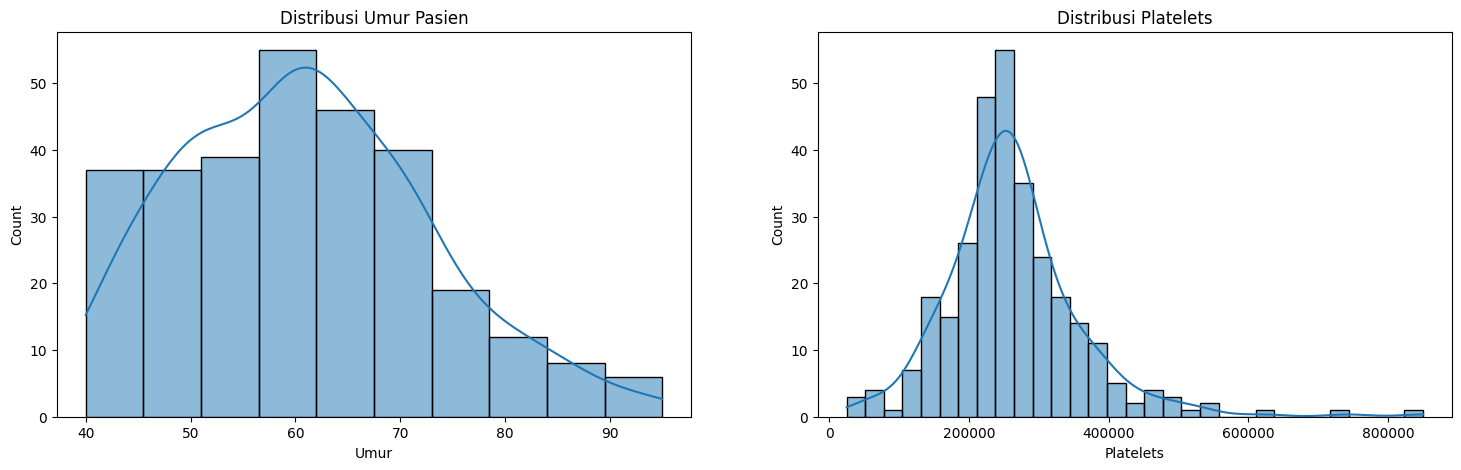

In [96]:
# Menggunakan histplot untuk melihat pola distribusi
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Histogram umur
sns.histplot(df['age'], kde=True, ax=axs[0])
axs[0].set_title('Distribusi Umur Pasien')
axs[0].set_xlabel('Umur')

# Histogram platelets
sns.histplot(df['platelets'], kde=True, ax=axs[1])
axs[1].set_title('Distribusi Platelets')
axs[1].set_xlabel('Platelets')
plt.show()


- Terlihat distribusi pasien cukup merata dari umur 40-50 dan berada di urutan no3 paling banyak dan paling banyak ada di umur 60 lalu diikuti 70, dan untuk 75 ketas sudah menurun tapi ada sampai usia 95an

- Untuk Trombosit sangat memuncak di 200k kecil dan menurun sampai 500k, ada juga di 100k an dan ada sedikit sampai 800k, yang artinya rata-rata trombosit ada di rentang normal 150.000 - 450.000ml

### 2. Bagaimana pola distribusi kadar serum_creatinine dalam darah pasien dan tingkat serum_sodium dalam darah pasien, apakah normal?

<Axes: xlabel='serum_sodium', ylabel='Count'>

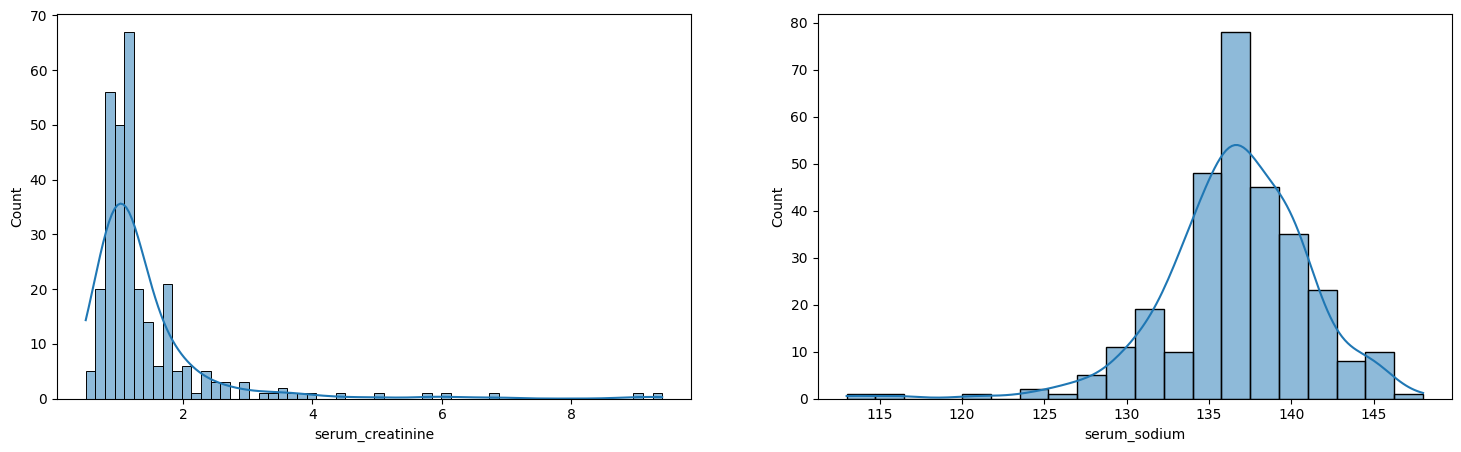

In [97]:
# Menggunakan histplot untuk melihat pola distribusi
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(df['serum_creatinine'], kde=True, ax=axs[0])
sns.histplot(df['serum_sodium'], kde=True, ax=axs[1])


In [165]:
import sklearn
sklearn.__version__

'1.6.1'

- Pola distribusi kadar serum cretinine dalam darah sangat tinggi di sekitar 1 walaupu  ada sedikit yang sampai 9 yang artinya rata-rata kadarnya normal

- Pola distribusi tingkat serum sodium juga normal ada di antara 135 - 145 walaupun ada sedikit yang rendah.

### 3. Kelompok jenis kelamin mana yang lebih banyak mengalami `anaemia`, `diabetes`, `high_blood_pressure`, dan `smoking`?


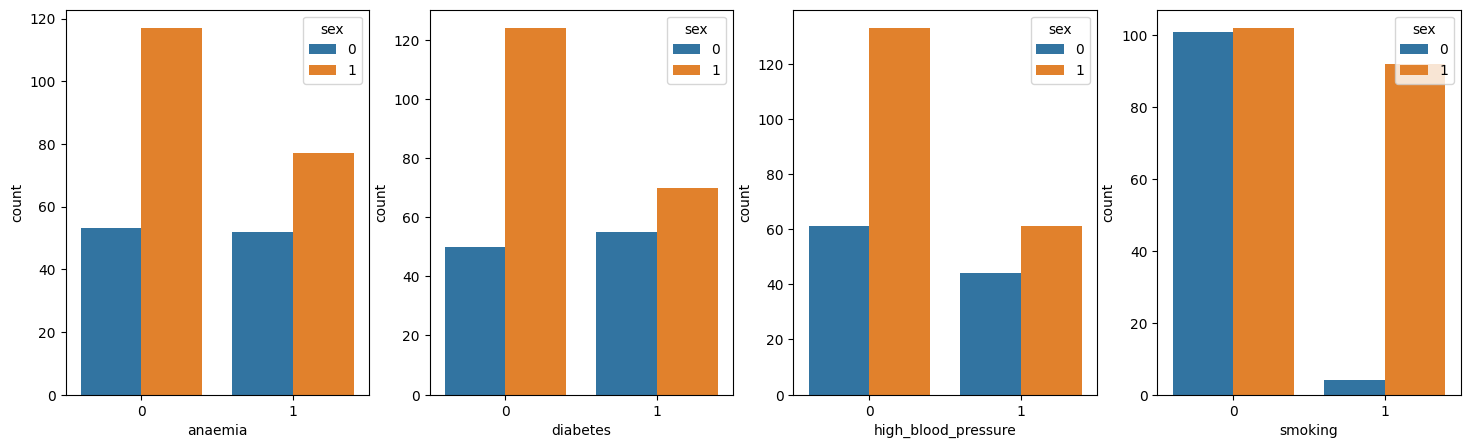

In [98]:
# Menggunakan countplot untuk menghitung jumlah
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
sns.countplot(x='anaemia', data=df, hue='sex', ax=axs[0])
sns.countplot(x='diabetes', data=df, hue='sex', ax=axs[1])
sns.countplot(x='high_blood_pressure', data=df, hue='sex', ax=axs[2])
sns.countplot(x='smoking', data=df, hue='sex', ax=axs[3])
plt.show()


- Anemia lebih banyak wanita di antara kedua gender dan yang tidak anemia juga wanita yang paling banyak, untuk pria rata-rata ada di 55 untuk iya dan tidaknya.
- Diabetes juga sama persis seperti anemia tapi rata-rata pria lebih banyak yang diabetes.
- Tekanan darah tinggi juga sama seperti sebelumnya tapi rata-rata pria lebih banyak yang tidak bertekanan darah tinggi.
- Kalau smoking yang tidak sangat tinggi berjumlah 100 untuk laki-laki dan perempuan dan yang smoking untuk perempuan hampir tidak ada, kalau pria sangat tinggi juga ada di 95an.

### 4. Bagaimana pengaruh kondisi kesehatan dan jenis kelamin terhadap kematian 

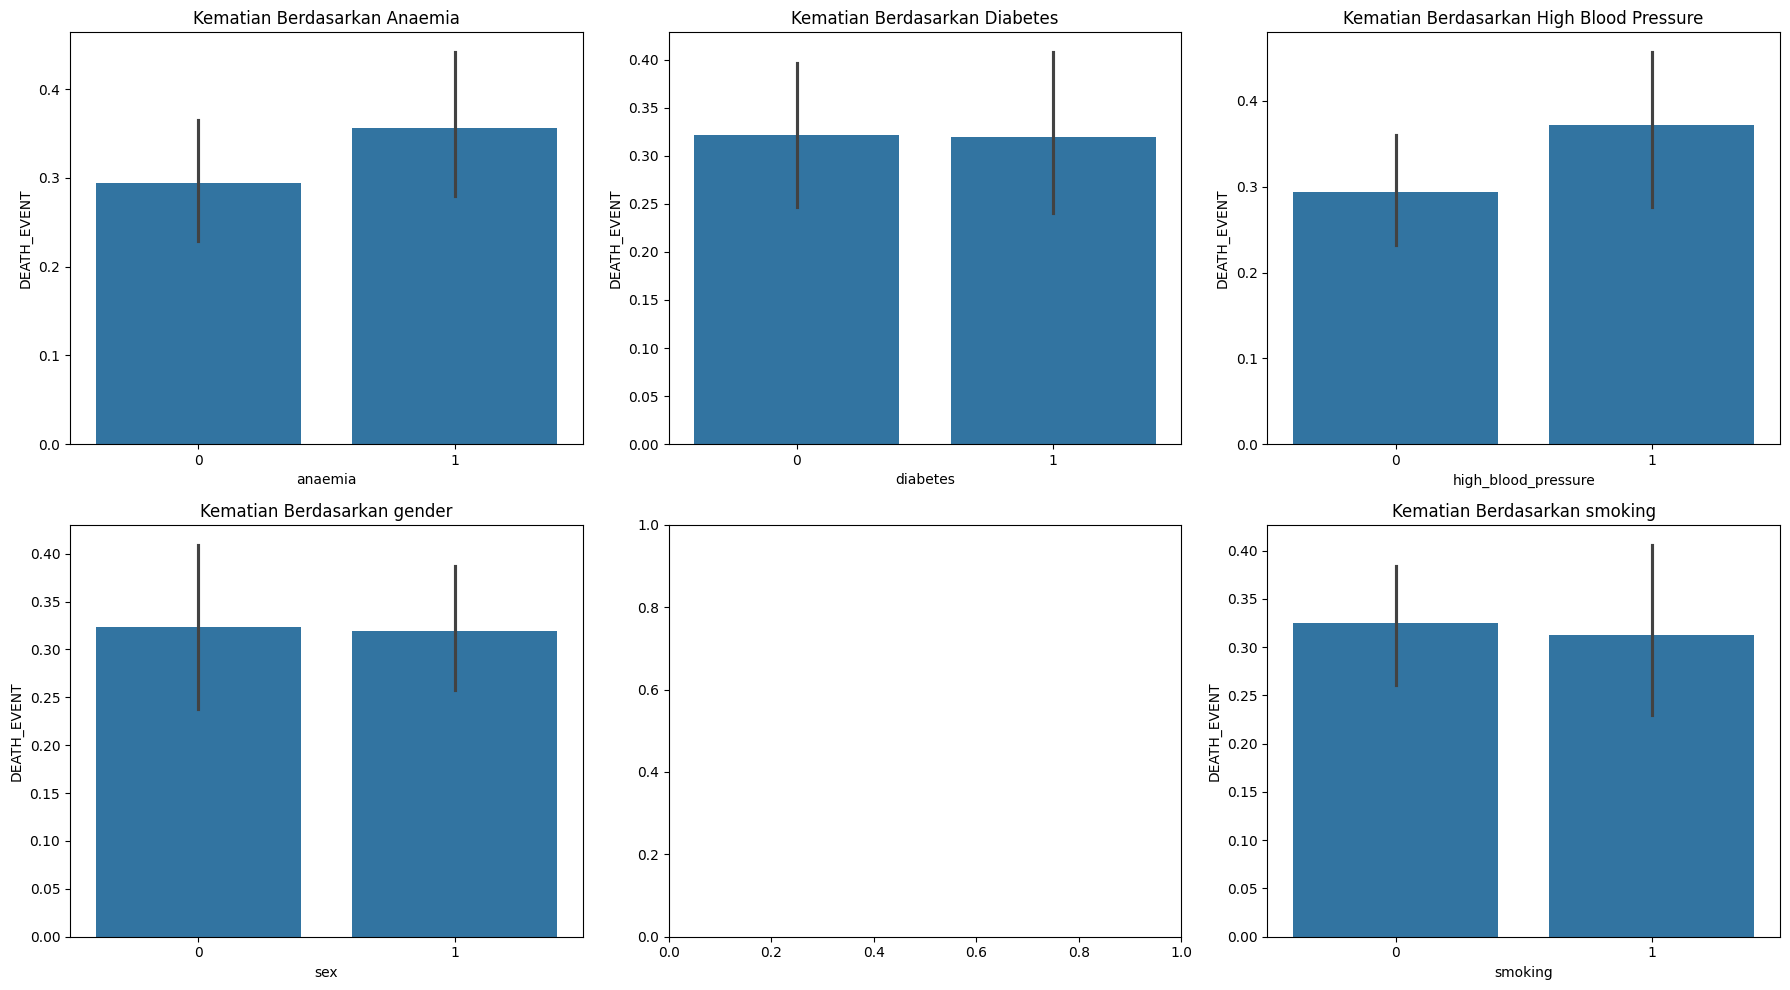

In [99]:
# Menggunakan barplot untuk membandingkan
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(x='anaemia', y='DEATH_EVENT',  data=df, ax=axs[0, 0])
axs[0, 0].set_title('Kematian Berdasarkan Anaemia')
sns.barplot(x='diabetes', y='DEATH_EVENT',  data=df, ax=axs[0, 1])
axs[0, 1].set_title('Kematian Berdasarkan Diabetes')
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT',  data=df, ax=axs[0, 2])
axs[0, 2].set_title('Kematian Berdasarkan High Blood Pressure')

sns.barplot(y='DEATH_EVENT', x='sex',  data=df, ax=axs[1, 0])
axs[1, 0].set_title('Kematian Berdasarkan gender')
sns.barplot(y='DEATH_EVENT', x='smoking',  data=df, ax=axs[1, 2])
axs[1, 2].set_title('Kematian Berdasarkan smoking')

plt.tight_layout()
plt.show()


- Untuk anemia ada di 35% dan yang tidak 39%
- Untuk diabetes sama-sama ada di 32% 
- Untuk tekanan darah tinggi ada di 30% dan yang tidak 39%
- Untuk gender perempuan ada di 33% dan laki-laki ada di 32%
- Untuk smoking ada di 32% dan yang tidak 33%

### 5. Bagaimana distribusi `serum_creatinine`, `age`, `platelets`, `ejection_fraction`, `creatinine_phosphokinase`, `serum_sodium` berdasarkan status kematian 

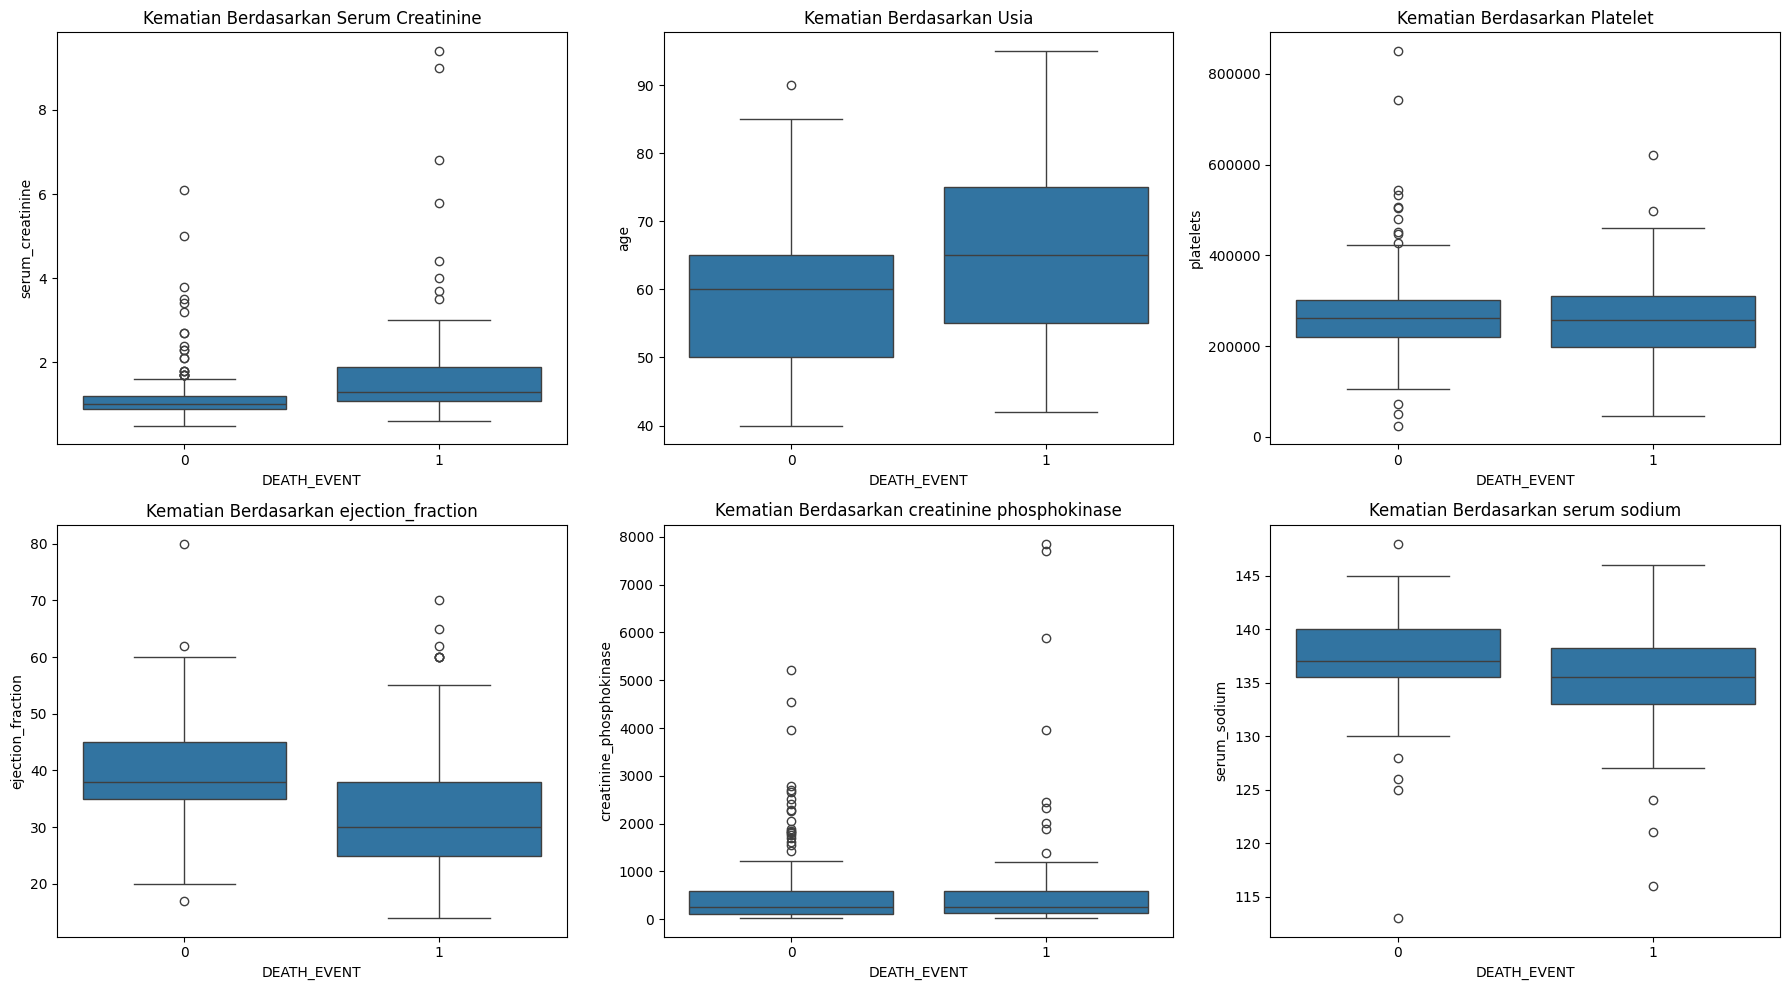

In [100]:
# Menggunakan boxplot untuk melihat distribusi
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Kematian Berdasarkan Serum Creatinine')
sns.boxplot(x='DEATH_EVENT', y='age', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Kematian Berdasarkan Usia')
sns.boxplot(x='DEATH_EVENT', y='platelets', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Kematian Berdasarkan Platelet')

sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Kematian Berdasarkan ejection_fraction')
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Kematian Berdasarkan creatinine phosphokinase')
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df, ax=axs[1, 2])
axs[1, 2].set_title('Kematian Berdasarkan serum sodium')

plt.tight_layout()
plt.show()


1. Serum Creatinine memiliki kematian rata-rata dan sebaran nilai yang lebih tinggi, bahkan beberapa outlier berada di atas nilai 6. Menunjukkan bahwa nilai serum creatinine yang tinggi berkaitan dengan peningkatan risiko kematian.

2. Usia untuk median sedikit lebih tinggi pada kelompok yang meninggal dibandingkan dengan yang tidak. Artinya usia yang lebih tua cenderung memiliki risiko kematian lebih tinggi.

3. Platelet sebaran nilainya relatif mirip antara dua kelompok, meskipun ada banyak outlier pada kedua sisi. Dan tidak menunjukkan perbedaan signifikan secara visual, tetapi tetap memiliki outlier ekstrem pada kelompok yang tidak meninggal.

4. Ejection Fraction median ejection fractionnya lebih rendah pada kelompok yang meninggal. Ini mengindikasikan bahwa ejection fraction rendah berkaitan dengan peningkatan risiko kematian.

5. Creatinine Phosphokinase kedua kelompok menunjukkan distribusi yang sangat lebar dan banyak outlier, terutama yang tidak meninggal. Jadi tidak menunjukkan pola distribusi yang jelas terhadap kematian.

6. Serum Sodium memiliki distribusi hampir sama untuk kedua kelompok, meskipun kelompok yang meninggal memiliki sedikit nilai ekstrem lebih rendah.

### 6. Bagaimana distribusi waktu follow up dan hubungannya dengan kematian 

<Axes: xlabel='time', ylabel='Count'>

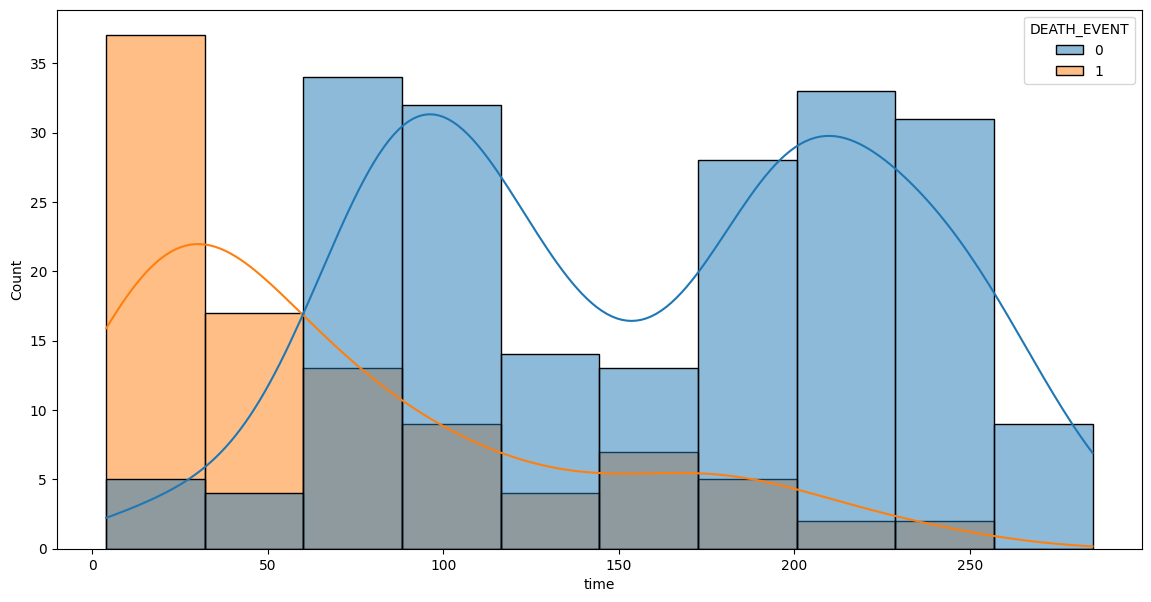

In [101]:
# Menggunakan histplot untuk melihat distribusi waktu dan hubungannya dengan kematian
fig = plt.subplots(figsize=(14, 7))
sns.histplot(data=df, x='time', hue='DEATH_EVENT', kde=True)

Terlihat kematian lebih banyak terjadi pada waktu follow-up yang lebih pendek, kemungkinan karena kondisi pasien sudah parah saat mulai dimonitor. Sebaliknya semakin lama waktu follow-up kemungkinan pasien bertahan hidup lebih besar.

### 7. Apakah pasien yang memiliki banyak jumlah kondisi kesehatan dari `anaemia`, `diabetes`, `high_blood_pressure`, dan `smoking` memiliki resiko kematian tinggi?

Text(0.5, 0, 'jumlah kondisi')

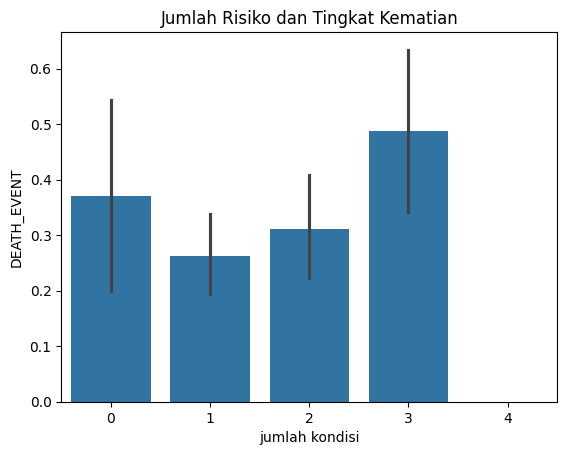

In [102]:
# Menggunakan barplot dan mengambil kolom tertentu saja dan dihitung perbaris
sns.barplot(x=df[['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']].sum(axis=1),y=df['DEATH_EVENT'])
plt.title('Jumlah Risiko dan Tingkat Kematian')
plt.xlabel('jumlah kondisi')

Terlihat jumlah risiko paling banyak yang memiliki presentase kematian tinggi 50%, namun yang tidak memiliki atau 0 berada di paling banyak kedua 39%, artinya ada faktor lain yang lebih kuat untuk tingginya resiko kematian.

# 5. Feature Engineering

## Handling cardinality

In [103]:
# Memisahkan kolom kategorik dan numerik 
cat_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

num_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium','time']


print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Categorical Columns :  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


In [104]:
# cek cardinality
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cat_columns:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,anaemia,2,"[0, 1]"
1,diabetes,2,"[0, 1]"
2,high_blood_pressure,2,"[1, 0]"
3,sex,2,"[1, 0]"
4,smoking,2,"[0, 1]"


cardinality rendah dan sudah di encode

## Split Between X dan y

In [105]:
# Memisahkan X dan y

X = df.drop(['DEATH_EVENT'], axis = 1)
y = df['DEATH_EVENT']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


## Splitting between Train Set and Test set

In [106]:
# Memisahkan train dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (224, 12)
Test Size (75, 12)


In [107]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
114,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,91
160,66.0,1,72,0,40,1,242000.00,1.20,134,1,0,121
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107
61,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60
173,50.0,1,115,0,20,0,189000.00,0.80,139,1,0,146
...,...,...,...,...,...,...,...,...,...,...,...,...
211,50.0,0,582,0,62,1,147000.00,0.80,140,1,1,192
67,72.0,1,110,0,25,0,274000.00,1.00,140,1,1,65
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23
196,45.0,0,582,1,38,1,263358.03,1.18,137,0,0,185


## Handling Outliers

In [108]:
# cek distribution dari skewness

listItem= []

for col in num_columns:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,age,0.5,normal
1,creatinine_phosphokinase,4.0,skewed
2,ejection_fraction,0.6,skewed
3,platelets,1.5,skewed
4,serum_creatinine,4.0,skewed
5,serum_sodium,-1.2,skewed
6,time,0.1,normal


In [109]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers_len = [
    len(X_train[(X_train[col] > upper_bound[i]) | (X_train[col] < lower_bound[i])])
    for i, col in enumerate(column)
]

outliers = pd.DataFrame({
    'column': column,
    # round the value
    'upper_boundary': [round(ub, 2) for ub in upper_bound],
    'lower_boundary': [round(lb, 2) for lb in lower_bound],
    'percentage_total_outlier': [round(p, 2) for p in percent_total_outlier],
    'outliers_len': outliers_len
})
outliers['non_outliers_len'] = [len(X_train) - ol for ol in outliers['outliers_len']]
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier,outliers_len,non_outliers_len
0,age,97.88,23.99,0.00,0,224
1,creatinine_phosphokinase,1967.25,-1265.00,7.14,16,208
2,ejection_fraction,90.00,-15.00,0.00,0,224
3,platelets,604750.00,-84750.00,1.34,3,221
4,serum_creatinine,3.70,-1.20,4.02,9,215
5,serum_sodium,155.00,118.25,0.89,2,222
6,time,364.77,-107.22,0.00,0,224


In [110]:
#compare with column stats
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,224.0,60.94,12.31,40.0,50.00,60.00,70.00,95.0
anaemia,224.0,0.44,0.50,0.0,0.00,0.00,1.00,1.0
creatinine_phosphokinase,224.0,607.47,976.61,23.0,120.25,257.50,582.00,7861.0
diabetes,224.0,0.40,0.49,0.0,0.00,0.00,1.00,1.0
ejection_fraction,224.0,38.58,12.20,14.0,30.00,38.00,45.00,80.0
high_blood_pressure,224.0,0.35,0.48,0.0,0.00,0.00,1.00,1.0
platelets,224.0,266836.81,102610.85,47000.0,210750.00,263358.03,309250.00,850000.0
serum_creatinine,224.0,1.48,1.16,0.5,0.90,1.10,1.60,9.4
serum_sodium,224.0,136.48,4.53,113.0,134.00,137.00,139.25,146.0
sex,224.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0


Menggunakan capping untuk handling outlier karena tidak mau kehilangan data.

In [111]:
# Menggunakan gaussian untuk feature yang normal
winsoriser = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['age'],
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)

In [112]:
# Menggunakan iqr untuk feature yang skew
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium','time'],
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train_capped)
X_test_capped = winsoriser.transform(X_test_capped)

In [113]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

age - Before Capping


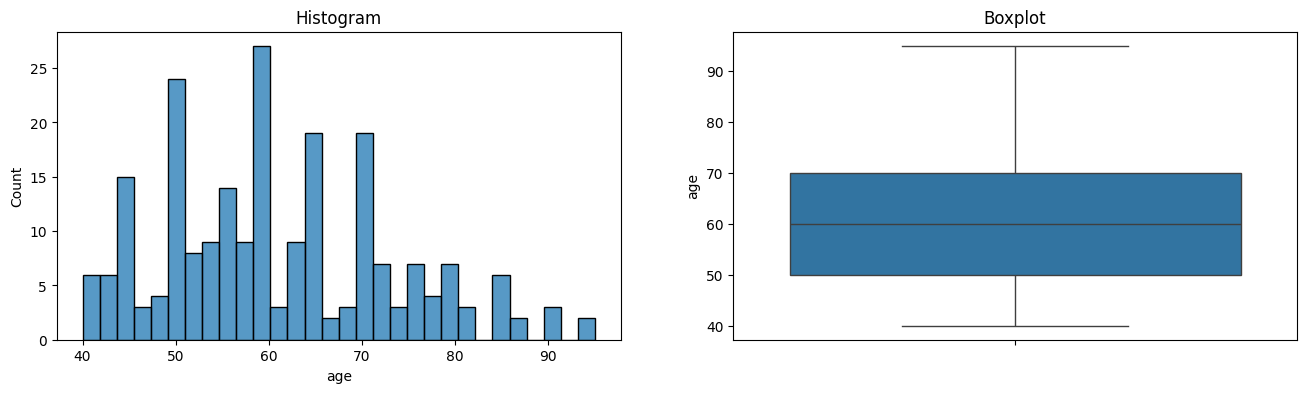


age - After Capping


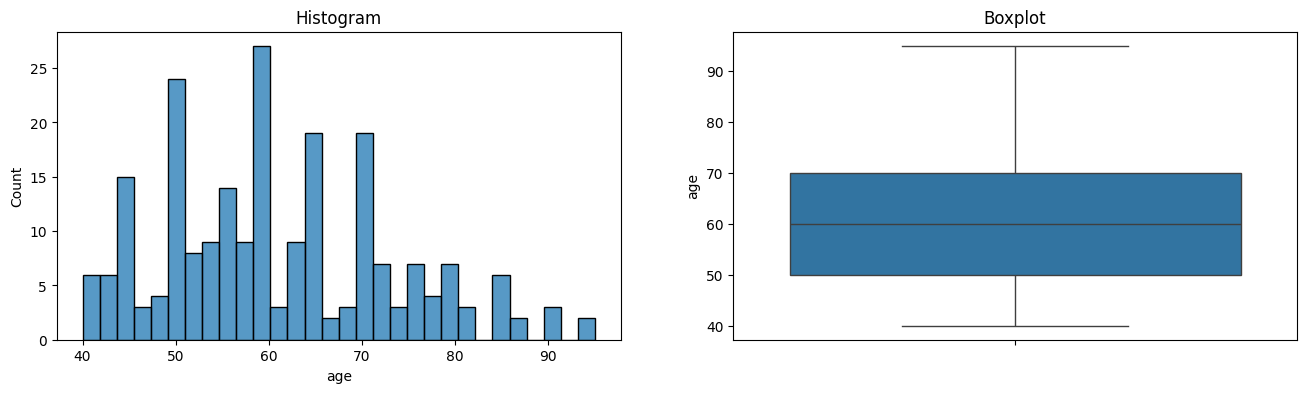

creatinine_phosphokinase - Before Capping


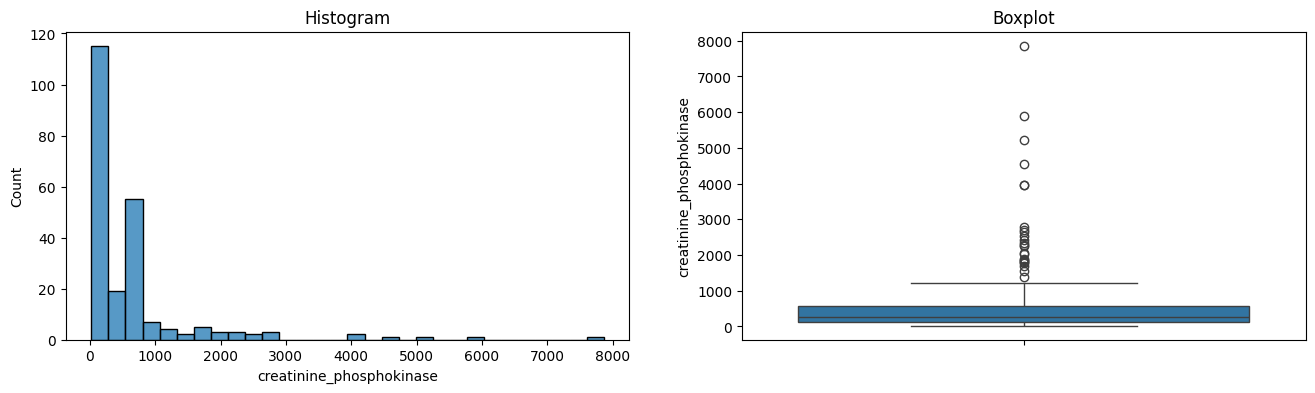


creatinine_phosphokinase - After Capping


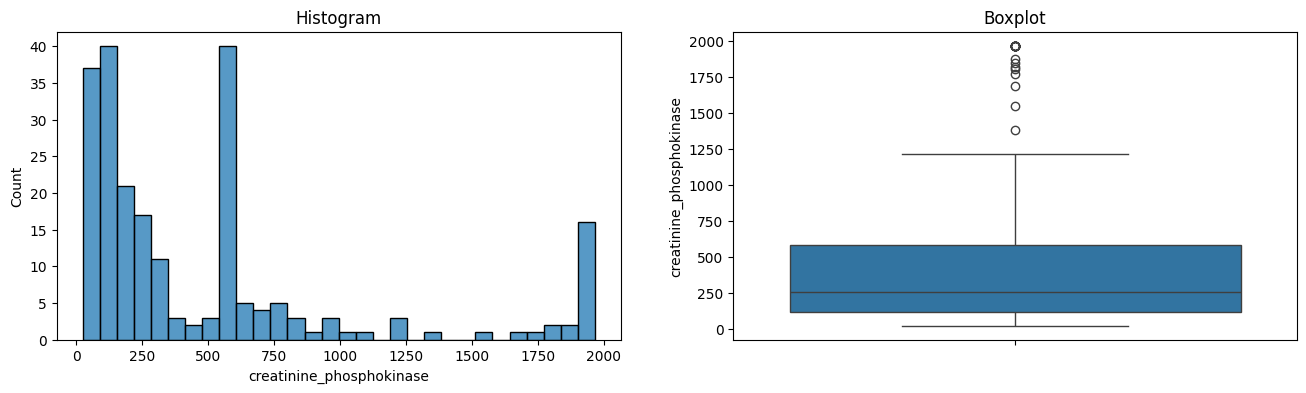

ejection_fraction - Before Capping


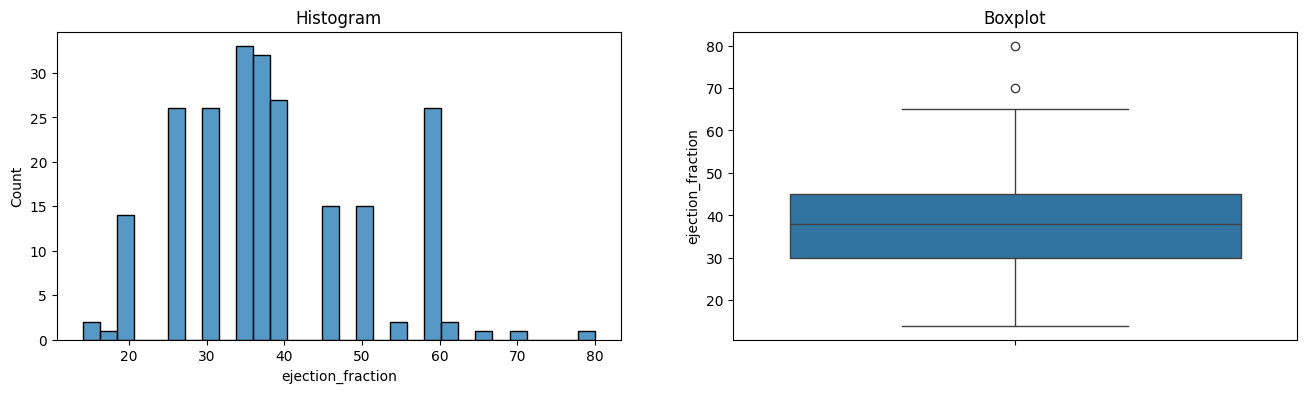


ejection_fraction - After Capping


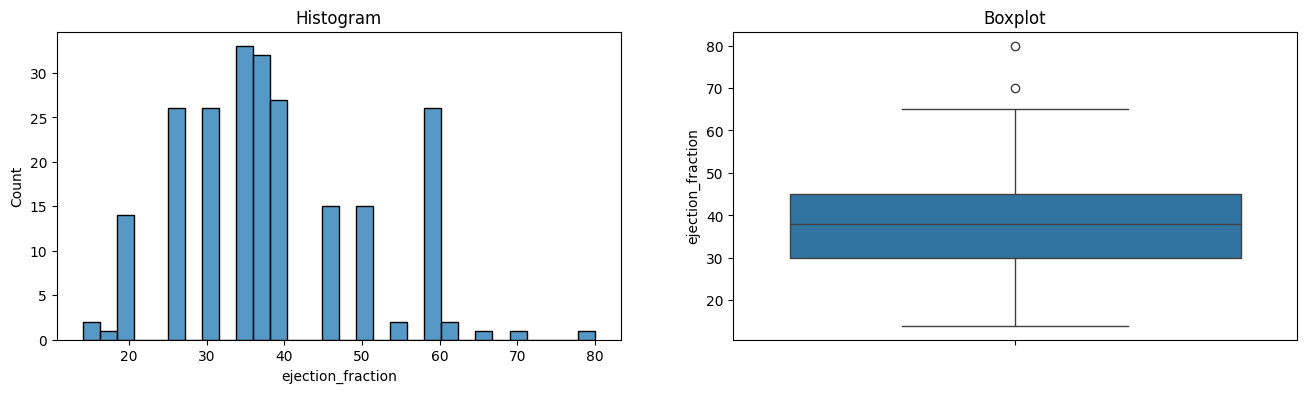

platelets - Before Capping


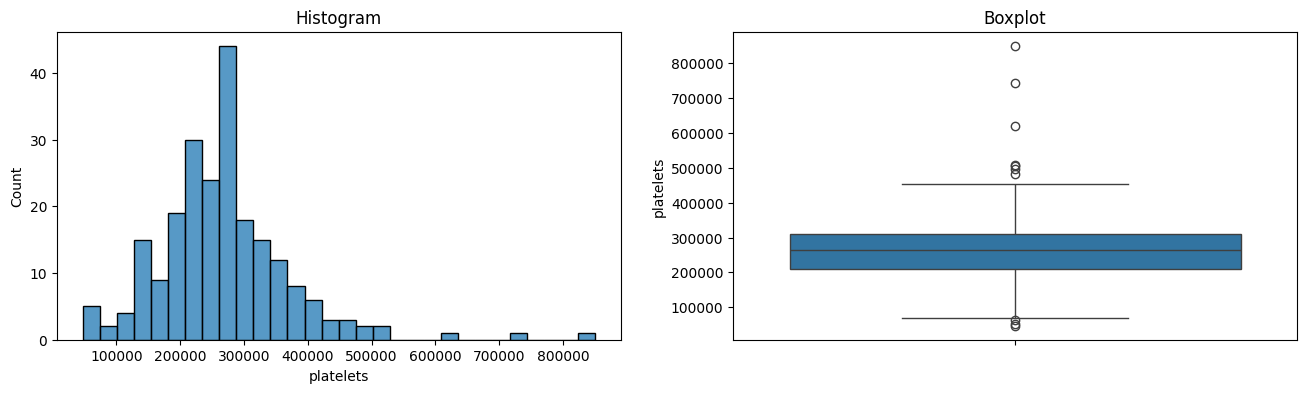


platelets - After Capping


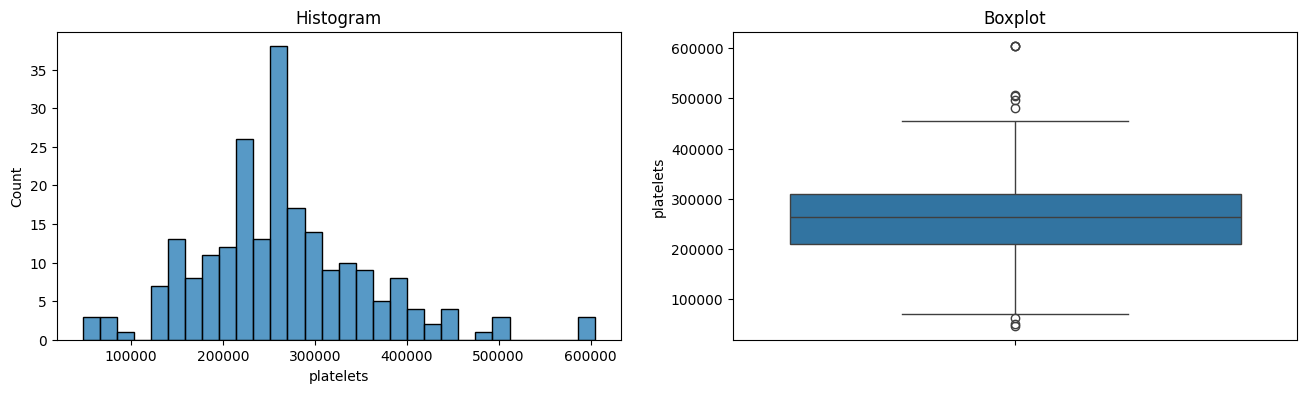

serum_creatinine - Before Capping


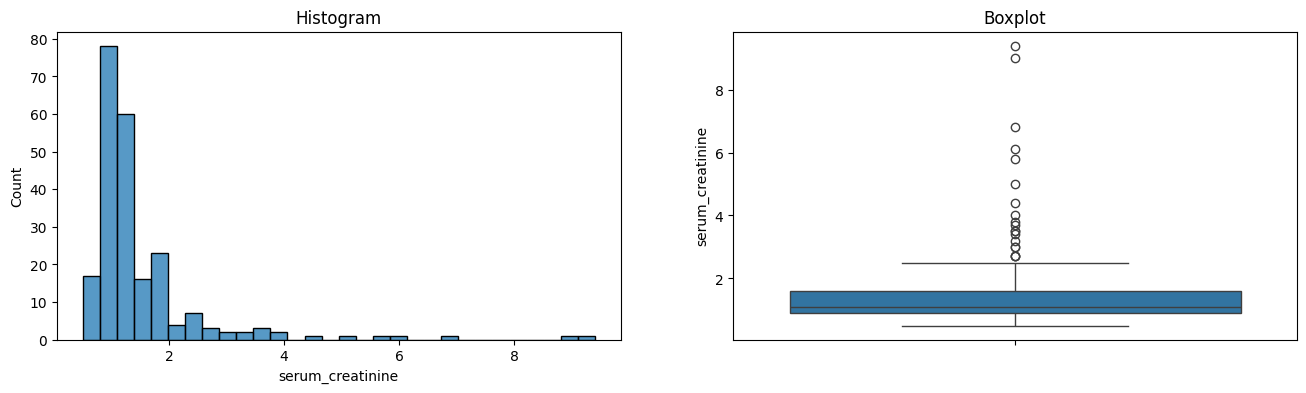


serum_creatinine - After Capping


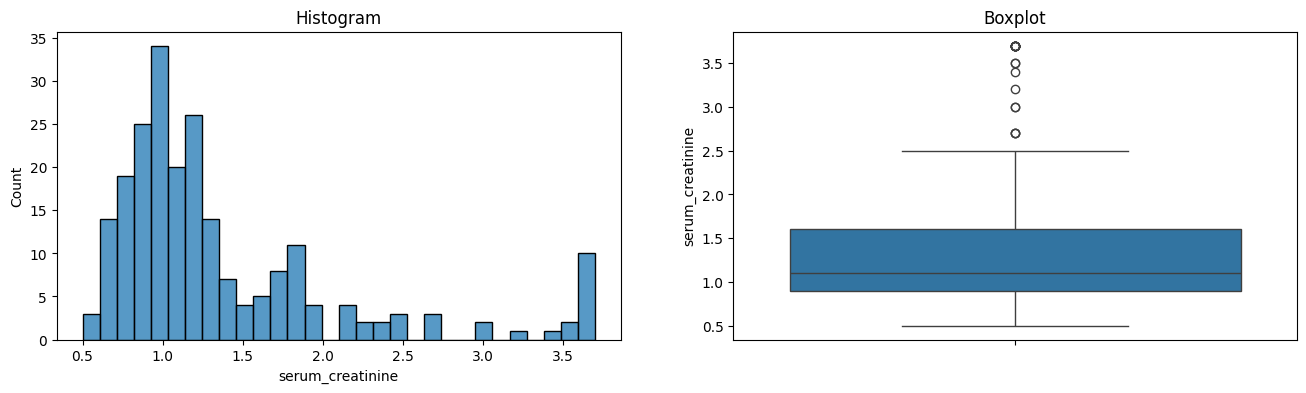

serum_sodium - Before Capping


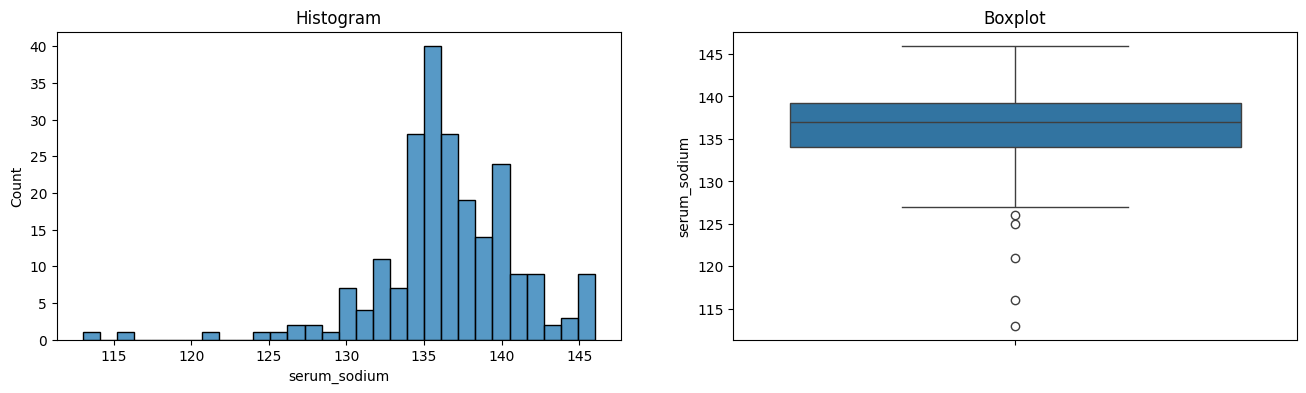


serum_sodium - After Capping


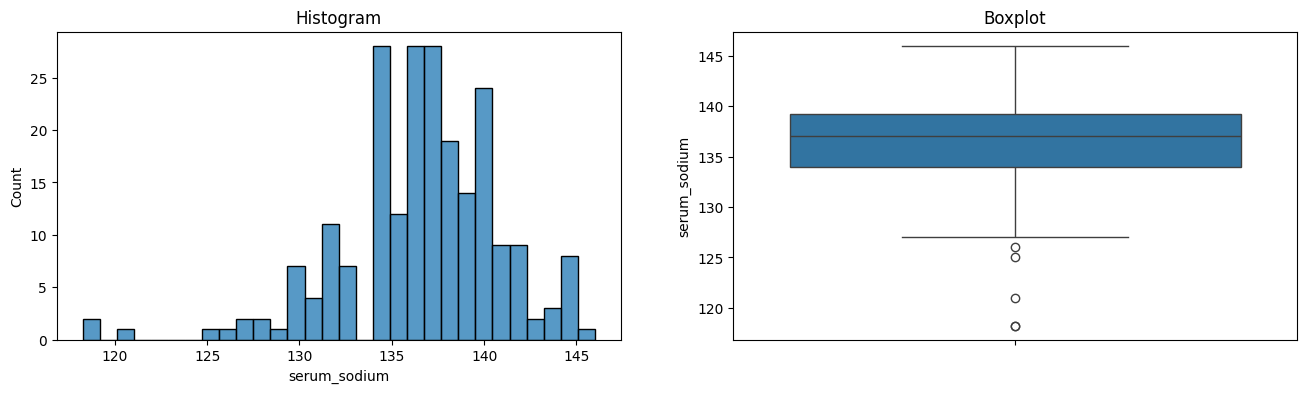

time - Before Capping


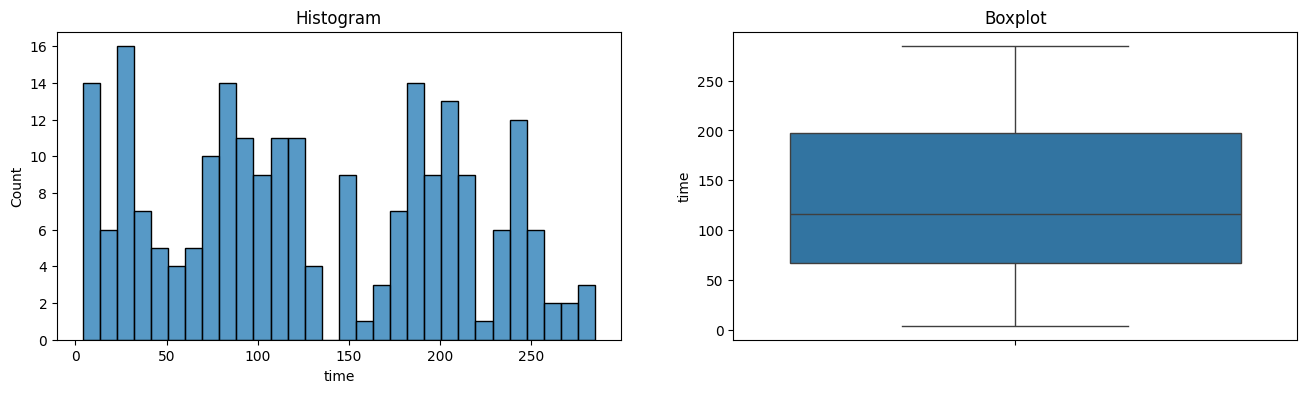


time - After Capping


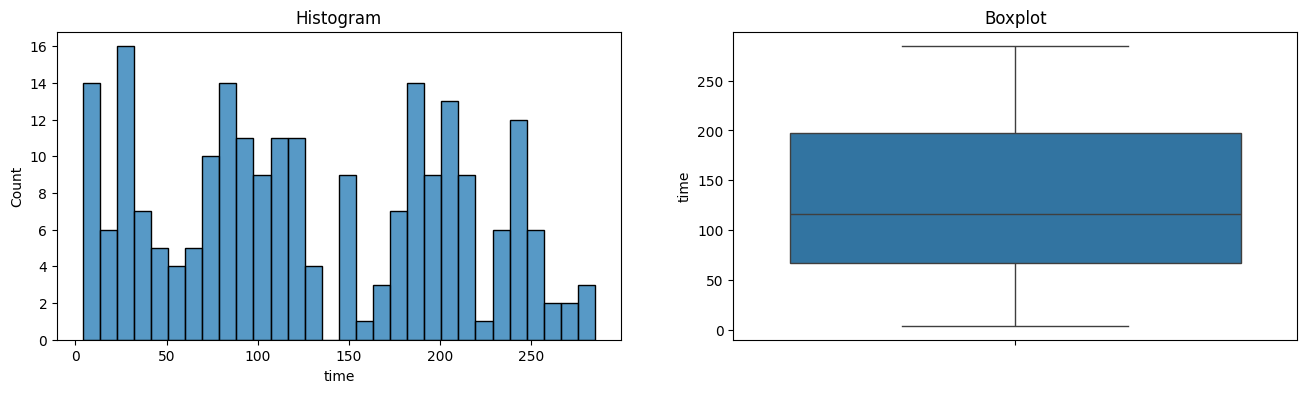

In [114]:
# Check the distribution before and after capping
for col in num_columns:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

## Handling Missing Value

In [115]:
X_train_capped.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [116]:
X_test_capped.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

Dilakukan pengecekan missing value pada setiap set dan tidak ditemukan adanya missing value

## Split Between Numeric Columns and Categorical Columns

In [117]:
#split numerical and categorical columns

X_train_num = X_train_capped[num_columns]
X_test_num = X_test_capped[num_columns]

X_train_cat = X_train_capped[cat_columns]
X_test_cat = X_test_capped[cat_columns]

X_train_num

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
114,60.0,754.0,40,328000.00,1.20,126.0,91
160,66.0,72.0,40,242000.00,1.20,134.0,121
132,46.0,719.0,40,263358.03,1.18,137.0,107
61,50.0,318.0,40,216000.00,2.30,131.0,60
173,50.0,115.0,20,189000.00,0.80,139.0,146
...,...,...,...,...,...,...,...
211,50.0,582.0,62,147000.00,0.80,140.0,192
67,72.0,110.0,25,274000.00,1.00,140.0,65
25,80.0,148.0,38,149000.00,1.90,144.0,23
196,45.0,582.0,38,263358.03,1.18,137.0,185


## Feature Selection

Cek korelasi kolom kategorik menggunakan chi square karena target kategorik dan feature kategorik

In [118]:
# Cek korelasi kolom kategorik menggunakan chi square 

p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
    tabel_kontingensi = pd.crosstab(X_train_cat[col], y_train)
    chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('ada korelasi')
    else:
        interpretasi.append('ga ada korelasi')

hasil = pd.DataFrame({
    'nama kolom': cols,
    'p_value': p_values,
    'hasil': interpretasi
})

print(hasil)


            nama kolom   p_value            hasil
0              anaemia  0.501934  ga ada korelasi
1             diabetes  0.888072  ga ada korelasi
2  high_blood_pressure  0.491034  ga ada korelasi
3                  sex  1.000000  ga ada korelasi
4              smoking  0.969829  ga ada korelasi


Hasilnya tidak ada korelasi semuanya, tapi masih saya pertahankan karena menurut saya mereka features penting

In [119]:
# Cek korelasi menggunakan kendalltau karena features numerik dan target kategorik
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = kendalltau(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,age,ada korelasi
1,creatinine_phosphokinase,ga ada korelasi
2,ejection_fraction,ada korelasi
3,platelets,ga ada korelasi
4,serum_creatinine,ada korelasi
5,serum_sodium,ada korelasi
6,time,ada korelasi


Hasilnya ada 2 yang tidak ada korelasi namun tetap saya pertahankan, untuk lebih pastinya akan saya cek feature importance analysis

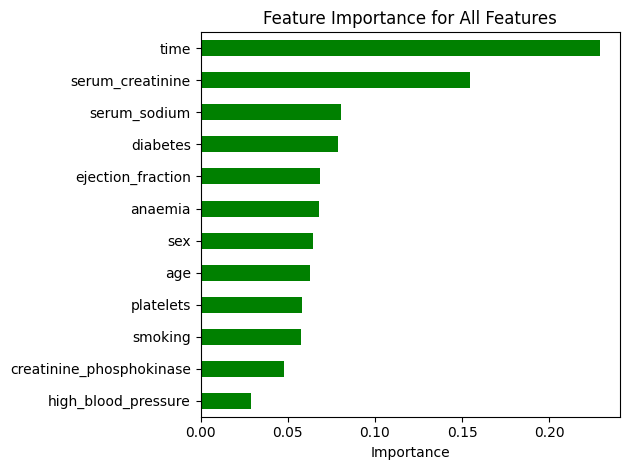

In [120]:
# Feature Importance Analysis
model = XGBClassifier()

model.fit(X_train_capped, y_train) 
feature_names = X_train_capped.columns

feat_importances = pd.Series(model.feature_importances_, index=feature_names)

feat_importances.nlargest(12).plot(kind='barh', color='green').invert_yaxis()  
plt.title('Feature Importance for All Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Berdasarkan hasil feature importance menggunakan XGBoostClassifier hasilnya tidak ada yang 0 jadi saya gunakan semua features nya.

In [121]:
# Create A Pipeline

num_pipeline = make_pipeline(MinMaxScaler())

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', 'passthrough', cat_columns)
])

# 6. Model Definition

## Base Model Using Pipeline

In [122]:
knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
knn.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [123]:
svm = make_pipeline(preprocessing_pipeline, SVC())
svm.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('svc', SVC())])

In [124]:
dt = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())
dt.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [125]:
rf = make_pipeline(preprocessing_pipeline, RandomForestClassifier())
rf.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [126]:
# boosting
xgb = make_pipeline(preprocessing_pipeline, XGBClassifier())
xgb.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('xgbclassifier',
                 XG...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

# 7. Base Model Evaluation

## KKN

Train
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       146
           1       0.80      0.51      0.62        78

    accuracy                           0.79       224
   macro avg       0.79      0.72      0.74       224
weighted avg       0.79      0.79      0.77       224


Test
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        57
           1       0.25      0.17      0.20        18

    accuracy                           0.68        75
   macro avg       0.51      0.50      0.50        75
weighted avg       0.64      0.68      0.66        75

Confusion Matrix : 
Confusion Matrix : 


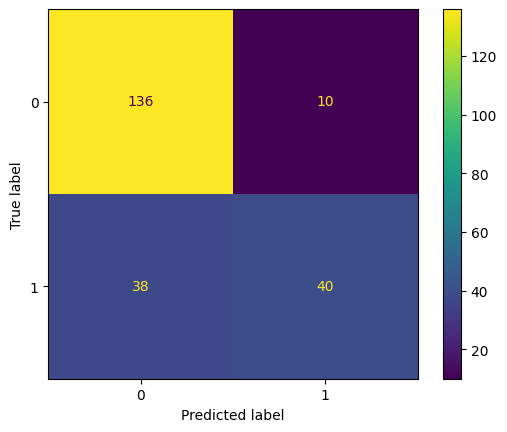

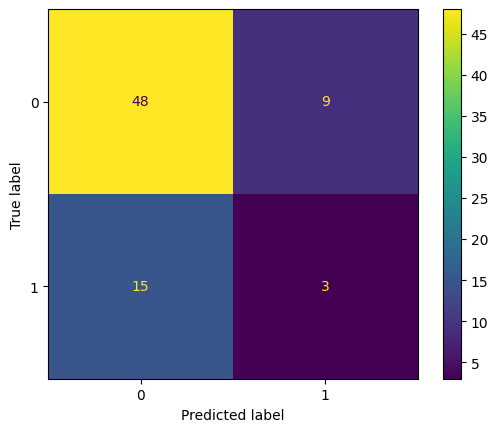

In [127]:

# Check performance model KNN

y_pred_train_knn = knn.predict(X_train_capped)
y_pred_test_knn = knn.predict(X_test_capped)
cm_train_knn_train = confusion_matrix(y_train, y_pred_train_knn)
cm_train_knn_test = confusion_matrix(y_test, y_pred_test_knn)

print('Train')
print(classification_report(y_train, y_pred_train_knn))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_knn))

print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_knn_train).plot())
print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_knn_test).plot())

In [128]:
# Create a function to check the performance KNN focusing to recall

def performance_knn_check(knn, X, y):
  y_pred = knn.predict(X)

  return recall_score(y, y_pred)

# Check model performance
print('Recall - Train : ', performance_knn_check(knn, X_train_capped, y_train))
print('Recall - Test  : ', performance_knn_check(knn, X_test_capped, y_test))

Recall - Train :  0.5128205128205128
Recall - Test  :  0.16666666666666666


In [129]:
# Cross Validation for recall KNN
precision_train_cross_val = cross_val_score(knn,
                                         X_train_capped,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('recall knn - All - Cross Validation  : ', precision_train_cross_val)
print('recall knn - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('recall knn - Std - Cross Validation  : ', precision_train_cross_val.std())
print('recall knn - Range of Test-Set       : ',
      (precision_train_cross_val.mean() - precision_train_cross_val.std()),
      '-', 
      (precision_train_cross_val.mean() + precision_train_cross_val.std()))


recall knn - All - Cross Validation  :  [0.30769231 0.23076923 0.30769231]
recall knn - Mean - Cross Validation :  0.2820512820512821
recall knn - Std - Cross Validation  :  0.03626188621469475
recall knn - Range of Test-Set       :  0.24578939583658735 - 0.31831316826597683


In [130]:
# Get FPR, TPR, and AUC Score from KNN
def evaluate_roc_auc(score):
    if score > 0.9:
        return "Good"
    elif score <= 0.9 and score >= 0.8:
        return "Fair"
    elif score < 0.8 and score >= 0.7:
        return "Decent"
    elif score < 0.7 and score >= 0.6:
        return "Not Great"
    else:
        return "Poor"

y_pred_proba_knn_train = knn.predict_proba(X_train_capped)[:, 1]
fpr_knn_train, tpr_knn_train, _train = roc_curve(y_train, y_pred_proba_knn_train)
auc_knn_train = roc_auc_score(y_train, y_pred_proba_knn_train)

print('Train AUC Score : ', auc_knn_train)
print('Train AUC Score : ', evaluate_roc_auc(auc_knn_train))

y_pred_proba_knn = knn.predict_proba(X_test_capped)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn_test = roc_auc_score(y_test, y_pred_proba_knn)

print('Test AUC Score : ', auc_knn_test)
print('Test AUC Score : ', evaluate_roc_auc(auc_knn_test))

Train AUC Score :  0.8634966631541974
Train AUC Score :  Fair
Test AUC Score :  0.6505847953216375
Test AUC Score :  Not Great


Hasil Evaluasi KNN Base Model

- Recall Train: 0.45 dan Test 0.14 artinya model overfitting

- Cross-val recall range : 0.20 - 0.33 model sangat tidak stabil di test set

- AUC Test: 0.61 artinya model tidak bagus dalam membedakan positif vs negatif

## SVM

Train
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       146
           1       0.93      0.65      0.77        78

    accuracy                           0.86       224
   macro avg       0.88      0.81      0.83       224
weighted avg       0.87      0.86      0.85       224


Test
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        57
           1       0.82      0.50      0.62        18

    accuracy                           0.85        75
   macro avg       0.84      0.73      0.76        75
weighted avg       0.85      0.85      0.84        75

Confusion Matrix : 
Confusion Matrix : 


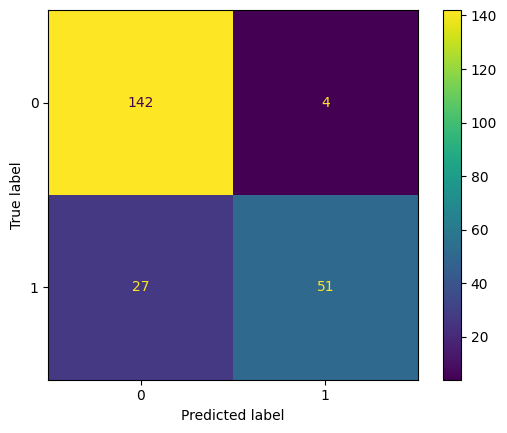

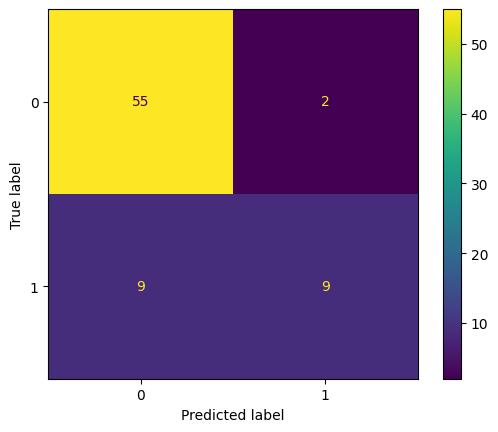

In [131]:

# Check performance model svm

y_pred_train_svm = svm.predict(X_train_capped)
y_pred_test_svm = svm.predict(X_test_capped)
cm_train_svm_train = confusion_matrix(y_train, y_pred_train_svm)
cm_train_svm_test = confusion_matrix(y_test, y_pred_test_svm)

print('Train')
print(classification_report(y_train, y_pred_train_svm))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_svm))

print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_svm_train).plot())
print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_svm_test).plot())

In [132]:
# Create a function to check the performance svm focusing to recall

def performance_svm_check(svm, X, y):
  y_pred = svm.predict(X)

  return recall_score(y, y_pred)

# Check model performance
print('Recall - Train : ', performance_svm_check(svm, X_train_capped, y_train))
print('Recall - Test  : ', performance_svm_check(svm, X_test_capped, y_test))

Recall - Train :  0.6538461538461539
Recall - Test  :  0.5


In [133]:
# Cross Validation for recall svm
precision_train_cross_val = cross_val_score(svm,
                                         X_train_capped,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('recall svm - All - Cross Validation  : ', precision_train_cross_val)
print('recall svm - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('recall svm - Std - Cross Validation  : ', precision_train_cross_val.std())
print('recall svm - Range of Test-Set       : ',
      (precision_train_cross_val.mean() - precision_train_cross_val.std()),
      '-', 
      (precision_train_cross_val.mean() + precision_train_cross_val.std()))


recall svm - All - Cross Validation  :  [0.38461538 0.46153846 0.46153846]
recall svm - Mean - Cross Validation :  0.43589743589743596
recall svm - Std - Cross Validation  :  0.03626188621469475
recall svm - Range of Test-Set       :  0.39963554968274123 - 0.4721593221121307


Hasil Evaluasi SVM Base Model

- Recall Train: 0.57 dan Test 0.35 artinya model overfitting

- Cross-val recall range : 0.27 - 0.35 model sangat tidak stabil di test set

## Decision Tree

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        78

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224


Test
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        57
           1       0.55      0.61      0.58        18

    accuracy                           0.79        75
   macro avg       0.71      0.73      0.72        75
weighted avg       0.80      0.79      0.79        75

Confusion Matrix : 
Confusion Matrix : 


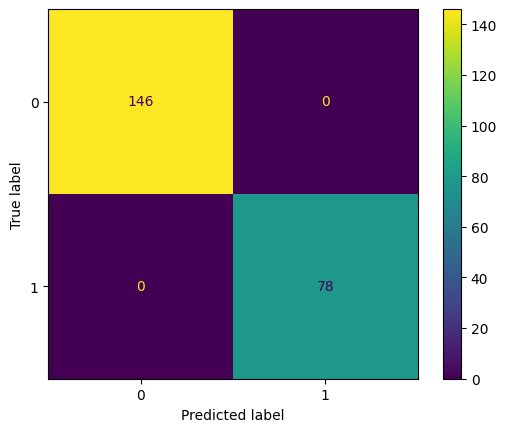

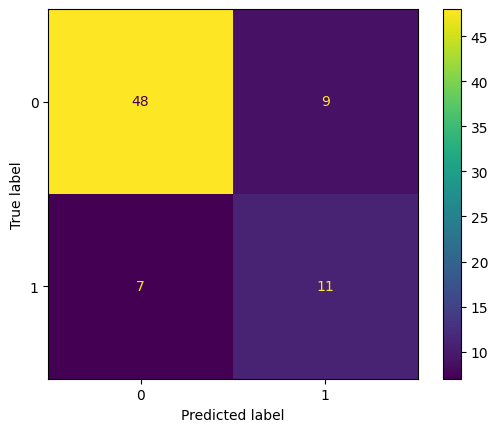

In [134]:

# Check performance model dt

y_pred_train_dt = dt.predict(X_train_capped)
y_pred_test_dt = dt.predict(X_test_capped)
cm_train_dt_train = confusion_matrix(y_train, y_pred_train_dt)
cm_train_dt_test = confusion_matrix(y_test, y_pred_test_dt)

print('Train')
print(classification_report(y_train, y_pred_train_dt))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_dt))

print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_dt_train).plot())
print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_dt_test).plot())

In [135]:
# Create a function to check the performance dt focusing to recall

def performance_dt_check(dt, X, y):
  y_pred = dt.predict(X)

  return recall_score(y, y_pred)

# Check model performance
print('Recall - Train : ', performance_dt_check(dt, X_train_capped, y_train))
print('Recall - Test  : ', performance_dt_check(dt, X_test_capped, y_test))

Recall - Train :  1.0
Recall - Test  :  0.6111111111111112


In [136]:
# Cross Validation for recall dt
precision_train_cross_val = cross_val_score(dt,
                                         X_train_capped,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('recall dt - All - Cross Validation  : ', precision_train_cross_val)
print('recall dt - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('recall dt - Std - Cross Validation  : ', precision_train_cross_val.std())
print('recall dt - Range of Test-Set       : ',
      (precision_train_cross_val.mean() - precision_train_cross_val.std()),
      '-', 
      (precision_train_cross_val.mean() + precision_train_cross_val.std()))


recall dt - All - Cross Validation  :  [0.65384615 0.73076923 0.61538462]
recall dt - Mean - Cross Validation :  0.6666666666666666
recall dt - Std - Cross Validation  :  0.04796996649710178
recall dt - Range of Test-Set       :  0.6186967001695649 - 0.7146366331637684


In [137]:
# Get FPR, TPR, and AUC Score from dt

y_pred_proba_dt_train = dt.predict_proba(X_train_capped)[:, 1]
fpr_dt_train, tpr_dt_train, _train = roc_curve(y_train, y_pred_proba_dt_train)
auc_dt_train = roc_auc_score(y_train, y_pred_proba_dt_train)

print('Train AUC Score : ', auc_dt_train)
print('Train AUC Score : ', evaluate_roc_auc(auc_dt_train))

y_pred_proba_dt = dt.predict_proba(X_test_capped)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt_test = roc_auc_score(y_test, y_pred_proba_dt)

print('Test AUC Score : ', auc_dt_test)
print('Test AUC Score : ', evaluate_roc_auc(auc_dt_test))

Train AUC Score :  1.0
Train AUC Score :  Good
Test AUC Score :  0.7266081871345029
Test AUC Score :  Decent


Hasil Evaluasi Decision Tree Base Model

- Recall Train: 1.0, tapi Test hanya 0.71 artinya indikasi overfitting

- Cross-val recall range : 0.55 - 0.69 model lumayan tidak stabil di test set

- AUC Test: 0.82 artinya model bagus dalam membedakan positif vs negatif

## Random Forest

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        78

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224


Test
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        57
           1       0.81      0.72      0.76        18

    accuracy                           0.89        75
   macro avg       0.86      0.83      0.85        75
weighted avg       0.89      0.89      0.89        75

Confusion Matrix : 
Confusion Matrix : 


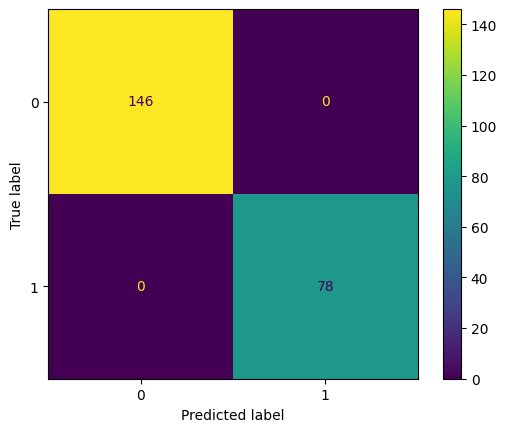

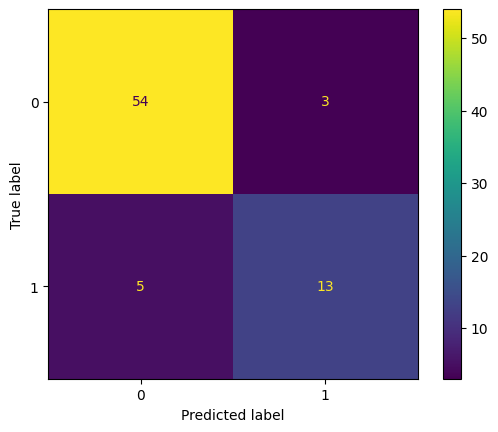

In [138]:

# Check performance model rf

y_pred_train_rf = rf.predict(X_train_capped)
y_pred_test_rf = rf.predict(X_test_capped)
cm_train_rf_train = confusion_matrix(y_train, y_pred_train_rf)
cm_train_rf_test = confusion_matrix(y_test, y_pred_test_rf)

print('Train')
print(classification_report(y_train, y_pred_train_rf))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_rf))

print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_rf_train).plot())
print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_rf_test).plot())

In [139]:
# Create a function to check the performance rf focusing to recall

def performance_rf_check(rf, X, y):
  y_pred = rf.predict(X)

  return recall_score(y, y_pred)

# Check model performance
print('Recall - Train : ', performance_rf_check(rf, X_train_capped, y_train))
print('Recall - Test  : ', performance_rf_check(rf, X_test_capped, y_test))

Recall - Train :  1.0
Recall - Test  :  0.7222222222222222


In [140]:
# Cross Validation for recall rf
precision_train_cross_val = cross_val_score(rf,
                                         X_train_capped,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('recall rf - All - Cross Validation  : ', precision_train_cross_val)
print('recall rf - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('recall rf - Std - Cross Validation  : ', precision_train_cross_val.std())
print('recall rf - Range of Test-Set       : ',
      (precision_train_cross_val.mean() - precision_train_cross_val.std()),
      '-', 
      (precision_train_cross_val.mean() + precision_train_cross_val.std()))


recall rf - All - Cross Validation  :  [0.80769231 0.57692308 0.65384615]
recall rf - Mean - Cross Validation :  0.6794871794871794
recall rf - Std - Cross Validation  :  0.09593993299420366
recall rf - Range of Test-Set       :  0.5835472464929757 - 0.7754271124813831


In [141]:
# Get FPR, TPR, and AUC Score from rf

y_pred_proba_rf_train = rf.predict_proba(X_train_capped)[:, 1]
fpr_rf_train, tpr_rf_train, _train = roc_curve(y_train, y_pred_proba_rf_train)
auc_rf_train = roc_auc_score(y_train, y_pred_proba_rf_train)

print('Train AUC Score : ', auc_rf_train)
print('Train AUC Score : ', evaluate_roc_auc(auc_rf_train))

y_pred_proba_rf = rf.predict_proba(X_test_capped)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf_test = roc_auc_score(y_test, y_pred_proba_rf)

print('Test AUC Score : ', auc_rf_test)
print('Test AUC Score : ', evaluate_roc_auc(auc_rf_test))

Train AUC Score :  1.0
Train AUC Score :  Good
Test AUC Score :  0.9351851851851852
Test AUC Score :  Good


Hasil Evaluasi Random Forest Base Model

- Recall Train: 1.0, tapi Test hanya 0.71 artinya indikasi overfitting

- Cross-val recall range : 0.63 - 0.75 model lumayan stabil di test set

- AUC Test: 0.95 artinya model sangat bagus dalam membedakan positif vs negatif

## XGBoost Classifier

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        78

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224


Test
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        57
           1       0.76      0.72      0.74        18

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Confusion Matrix : 
Confusion Matrix : 


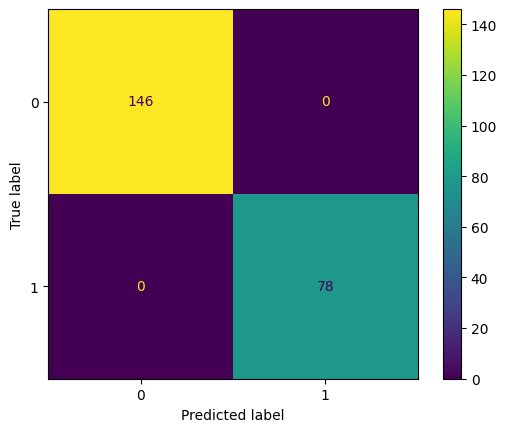

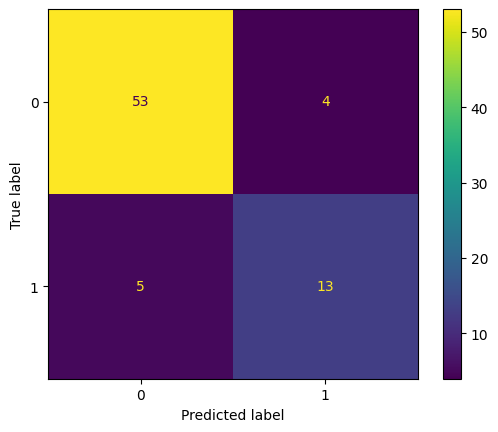

In [142]:

# Check performance model xgb

y_pred_train_xgb = xgb.predict(X_train_capped)
y_pred_test_xgb = xgb.predict(X_test_capped)
cm_train_xgb_train = confusion_matrix(y_train, y_pred_train_xgb)
cm_train_xgb_test = confusion_matrix(y_test, y_pred_test_xgb)

print('Train')
print(classification_report(y_train, y_pred_train_xgb))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_xgb))

print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_xgb_train).plot())
print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_xgb_test).plot())

In [143]:
# Create a function to check the performance xgb focusing to recall

def performance_xgb_check(xgb, X, y):
  y_pred = xgb.predict(X)

  return recall_score(y, y_pred)

# Check model performance
print('Recall - Train : ', performance_rf_check(xgb, X_train_capped, y_train))
print('Recall - Test  : ', performance_rf_check(xgb, X_test_capped, y_test))

Recall - Train :  1.0
Recall - Test  :  0.7222222222222222


In [144]:
# Cross Validation for recall xgb
precision_train_cross_val = cross_val_score(xgb,
                                         X_train_capped,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('recall rf - All - Cross Validation  : ', precision_train_cross_val)
print('recall rf - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('recall rf - Std - Cross Validation  : ', precision_train_cross_val.std())
print('recall rf - Range of Test-Set       : ',
      (precision_train_cross_val.mean() - precision_train_cross_val.std()),
      '-', 
      (precision_train_cross_val.mean() + precision_train_cross_val.std()))


recall rf - All - Cross Validation  :  [0.61538462 0.65384615 0.69230769]
recall rf - Mean - Cross Validation :  0.6538461538461539
recall rf - Std - Cross Validation  :  0.03140371465106637
recall rf - Range of Test-Set       :  0.6224424391950875 - 0.6852498684972202


In [145]:
# Get FPR, TPR, and AUC Score from xgb

y_pred_proba_xgb_train = xgb.predict_proba(X_train_capped)[:, 1]
fpr_xgb_train, tpr_xgb_train, _train = roc_curve(y_train, y_pred_proba_xgb_train)
auc_xgb_train = roc_auc_score(y_train, y_pred_proba_xgb_train)

print('Train AUC Score : ', auc_xgb_train)
print('Train AUC Score : ', evaluate_roc_auc(auc_xgb_train))

y_pred_proba_xgb = xgb.predict_proba(X_test_capped)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb_test = roc_auc_score(y_test, y_pred_proba_xgb)

print('Test AUC Score : ', auc_xgb_test)
print('Test AUC Score : ', evaluate_roc_auc(auc_xgb_test))

Train AUC Score :  1.0
Train AUC Score :  Good
Test AUC Score :  0.9278752436647174
Test AUC Score :  Good


## Base Model Comparison

In [146]:
models = {
    'KNN' : knn,
    'SVM' : svm,
    'Decision Tree' : dt,
    'Random Forest' : rf,
    'XGBoost' : xgb
}

metrics = {
    'Recall' : recall_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Recall', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test_capped))

df_model

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Recall,0.166667,0.5,0.611111,0.722222,0.722222
F1-Score,0.2,0.62069,0.578947,0.764706,0.742857


In [147]:
models = {
    'KNN' : knn,
    'SVM' : svm,
    'Decision Tree' : dt,
    'Random Forest' : rf,
    'XGBoost' : xgb
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

# Loop setiap model
for name, model in models.items():
    scores = cross_val_score(model, X_train_capped, y_train, cv=3, scoring='recall')
    df_cross_val.loc['Mean', name] = scores.mean()
    df_cross_val.loc['Std', name] = scores.std()

df_cross_val

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Mean,0.282051,0.435897,0.653846,0.679487,0.653846
Std,0.036262,0.036262,0.083086,0.079031,0.031404


---
Hasil Evaluasi Base Model:

Fokus di Recall karena mau mengurangi FN, karena lebih bahasa FN(diprediksi tidak meninggal tapi meninggal)

1. KNN	Buruk sekali (rendah recall cuma 0.16 hanya bisa mendeteksi 16% dari label positif.)

2. SVM	Lumayan ada di 0.5, tapi kalah dari Random Forest & XGBoost

3. Decision Tree cukup baik ada di 0.6, tapi kurang stabil

4. Random Forest kuat ada di 0.72, tapi agak fluktuatif dilihat dari std CV yang tinggi 0.09

5. XGBoost sama kuatnya dengan RF di 0.72 dan std nya lebih kecil di 0.03 jadi ini model yang paling baik.

---

# 8. Model Training Optimization

In [148]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters khusus untuk xgbclassifier
param_dist = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 10],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbclassifier__gamma': [0, 1, 5],
    'xgbclassifier__reg_alpha': [0, 0.1, 1],
    'xgbclassifier__reg_lambda': [1, 1.5, 2],
    'xgbclassifier__min_child_weight': [1, 3, 5]
}
param_dist


{'xgbclassifier__n_estimators': [100, 200, 300],
 'xgbclassifier__max_depth': [3, 5, 10],
 'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
 'xgbclassifier__subsample': [0.6, 0.8, 1.0],
 'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
 'xgbclassifier__gamma': [0, 1, 5],
 'xgbclassifier__reg_alpha': [0, 0.1, 1],
 'xgbclassifier__reg_lambda': [1, 1.5, 2],
 'xgbclassifier__min_child_weight': [1, 3, 5]}

In [149]:
# Train with Random Search 
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=46
)

random_search.fit(X_train_capped, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['age',
                                                                                'creatinine_phosphokinase',
                                                                                'ejection_fraction',
                                                                                'platelets',
                                                                                'serum_creatinine',
                                                                                'serum_sodium',
                                                                                'time']),
                                                                              ('pipe_cat',
                                                                               'passthrough',
                                                                               ['anaemia',
                                                                                'diabetes',
                                                                                'high_blood_pressure',
                                                                                'sex',...
                                        'xgbclassifier__gamma': [0, 1, 5],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2],
                                        'xgbclassifier__max_depth': [3, 5, 10],
                                        'xgbclassifier__min_child_weight': [1,
                                                                            3,
                                                                            5],
                                        'xgbclassifier__n_estimators': [100,
                                                                        200,
                                                                        300],
                                        'xgbclassifier__reg_alpha': [0, 0.1, 1],
                                        'xgbclassifier__reg_lambda': [1, 1.5,
                                                                      2],
                                        'xgbclassifier__subsample': [0.6, 0.8,
                                                                     1.0]},
                   random_state=46, scoring='recall', verbose=1)

In [150]:
# Get Best Hyperparameters
random_search.best_params_

{'xgbclassifier__subsample': 0.8,
 'xgbclassifier__reg_lambda': 2,
 'xgbclassifier__reg_alpha': 0.1,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__gamma': 1,
 'xgbclassifier__colsample_bytree': 1.0}

In [151]:
# Get Best Estimator
random_search_best = random_search.best_estimator_

# 9. Model Evaluation Optimization

Train
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       146
           1       0.95      0.92      0.94        78

    accuracy                           0.96       224
   macro avg       0.95      0.95      0.95       224
weighted avg       0.96      0.96      0.96       224


Test
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        57
           1       0.76      0.72      0.74        18

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Confusion Matrix : 
Confusion Matrix : 


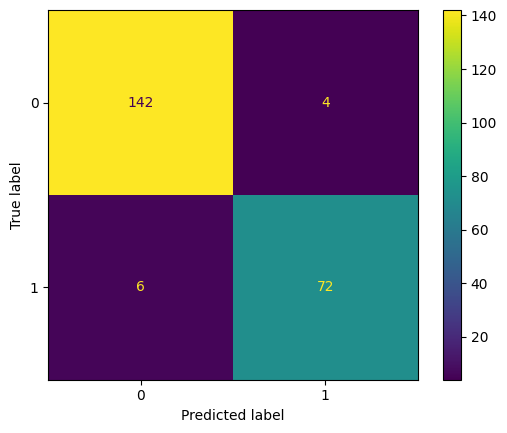

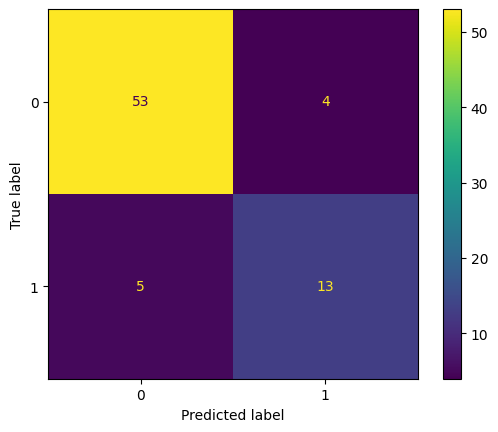

In [152]:

# Check performance model rf

y_pred_train_rf = random_search_best.predict(X_train_capped)
y_pred_test_rf = random_search_best.predict(X_test_capped)
cm_train_rf_train = confusion_matrix(y_train, y_pred_train_rf)
cm_train_rf_test = confusion_matrix(y_test, y_pred_test_rf)

print('Train')
print(classification_report(y_train, y_pred_train_rf))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_rf))

print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_rf_train).plot())
print('Confusion Matrix : \n', ConfusionMatrixDisplay(cm_train_rf_test).plot())

In [153]:
# Create a function to check the performance rf focusing to recall

def performance_rf_check(random_search_best, X, y):
  y_pred = random_search_best.predict(X)

  return recall_score(y, y_pred)

# Check model performance
print('Recall - Train : ', performance_rf_check(random_search_best, X_train_capped, y_train))
print('Recall - Test  : ', performance_rf_check(random_search_best, X_test_capped, y_test))

Recall - Train :  0.9230769230769231
Recall - Test  :  0.7222222222222222


In [154]:
# Cross Validation for recall rf
precision_train_cross_val = cross_val_score(random_search_best,
                                         X_train_capped,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('recall rf - All - Cross Validation  : ', precision_train_cross_val)
print('recall rf - Mean - Cross Validation : ', precision_train_cross_val.mean())
print('recall rf - Std - Cross Validation  : ', precision_train_cross_val.std())
print('recall rf - Range of Test-Set       : ',
      (precision_train_cross_val.mean() - precision_train_cross_val.std()),
      '-', 
      (precision_train_cross_val.mean() + precision_train_cross_val.std()))


recall rf - All - Cross Validation  :  [0.53846154 0.73076923 0.69230769]
recall rf - Mean - Cross Validation :  0.6538461538461539
recall rf - Std - Cross Validation  :  0.08308641921035718
recall rf - Range of Test-Set       :  0.5707597346357967 - 0.736932573056511


In [ ]:
# Get FPR, TPR, and AUC Score from xgb

y_pred_proba_xgb_train = random_search_best.predict_proba(X_train_capped)[:, 1]
fpr_xgb_train, tpr_xgb_train, _train = roc_curve(y_train, y_pred_proba_xgb_train)
auc_xgb_train = roc_auc_score(y_train, y_pred_proba_xgb_train)

print('Train AUC Score : ', auc_xgb_train)
print('Train AUC Score : ', evaluate_roc_auc(auc_xgb_train))

y_pred_proba_xgb = random_search_best.predict_proba(X_test_capped)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb_test = roc_auc_score(y_test, y_pred_proba_xgb)

print('Test AUC Score : ', auc_xgb_test)
print('Test AUC Score : ', evaluate_roc_auc(auc_xgb_test))

Train AUC Score :  0.9925360028099754
Train AUC Score :  Good
Test AUC Score :  0.9376218323586745
Test AUC Score :  Good


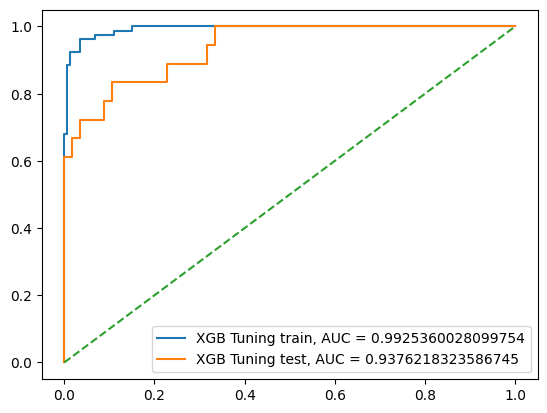

In [162]:
plt.figure(0).clf()
plt.plot(fpr_rf_train, tpr_rf_train, label='XGB Tuning train, AUC = ' + str(auc_rf_train))
plt.plot(fpr_rf, tpr_rf, label='XGB Tuning test, AUC = ' + str(auc_rf_test))
plt.plot([0, 1], linestyle='--')
plt.legend(loc=0)

In [157]:
models = {
    'KNN' : knn,
    'SVM' : svm,
    'Decision Tree' : dt,
    'Random Forest' : rf,
    'XGBoost' : xgb,
    'XGBoost tuning' : random_search_best
}

metrics = {
    'Recall' : recall_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Recall', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test_capped))

In [158]:
models = {
    'KNN' : knn,
    'SVM' : svm,
    'Decision Tree' : dt,
    'Random Forest' : rf,
    'XGBoost' : xgb,
    'XGBoost tuning' : random_search_best
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

# Loop setiap model
for name, model in models.items():
    scores = cross_val_score(model, X_train_capped, y_train, cv=3, scoring='recall')
    df_cross_val.loc['Mean', name] = scores.mean()
    df_cross_val.loc['Std', name] = scores.std()

df_cross_val

,KNN,SVM,Decision Tree,Random Forest,XGBoost,XGBoost tuning
Mean,0.282051,0.435897,0.705128,0.653846,0.653846,0.653846
Std,0.036262,0.036262,0.018131,0.083086,0.031404,0.083086


In [159]:
df_model

,KNN,SVM,Decision Tree,Random Forest,XGBoost,XGBoost tuning
Recall,0.166667,0.5,0.611111,0.722222,0.722222,0.722222
F1-Score,0.2,0.62069,0.578947,0.764706,0.742857,0.742857


Hasilnya sama saja setelah dituning dan sebelum dituning, tapi untuk std nya malah lebih besar setelah dituning, jadi saya akan menggunakan XGB base model untuk di save.

# 10. Model Saving

In [ ]:
# Menggunakan XGB base model
pickle.dump(xgb, open('model.pkl', 'wb'))

# 11. Model Inference

Ada di inference.ipynb

# 12. Pengambilan Kesimpulan

## Kesimpulan Evaluasi Model

Fokus utama dari pemodelan ini adalah **Recall**, karena tujuannya untuk **mengurangi False Negative (FN)** yaitu kasus pasien yang diprediksi *tidak meninggal*, padahal sebenarnya *meninggal*. Hal ini penting karena FN lebih berbahaya dalam konteks medis.

---

### Analisis dan Keputusan

- **KNN**: Sangat buruk, recall rendah cuma 0.17, artinya cuma bisa mendeteksi 17% dari kasus meninggal.
- **SVM**: Lumayan, recall di angka 0.5, tapi masih kalah dengan Random Forest dan XGBoost.
- **Decision Tree**: Cukup baik dengan recall 0.61, tapi kurang stabil.
- **Random Forest**: Recall tinggi (0.72), tapi standar deviasi CV-nya besar (0.09) hasilnya agak fluktuatif.
- **XGBoost (Base)**: Recall juga 0.72 tapi lebih stabil karena std-nya kecil (0.03) ini model terbaik.
- **XGBoost (Tuned)**: Hasilnya sama aja kayak base model, tapi std-nya malah lebih besar, dan peningkatan AUC juga tidak signifikan.

---

### Keputusan Akhir

**XGBoost Base Model** dipilih sebagai model final karena:
- Recall tinggi dan lebih stabil
- F1-score juga bagus
- AUC di data test sangat baik
- Tuning tidak memberi peningkatan yang berarti
